#Classificação Binária

### Bibliotecas

Lista de Bibliotecas utilizadas:
 

*   **Pandas** - Permite trabalhar com Dataframe, utilizada para carregar os dados;
*   **Numpy** - Permite trabalhar com algumas operações matemática e com arrays;
*   **Matplotlib** - Permite gerar gráficos;
*   **Sklearn (Scikit-learn)** - Biblioteca que permite trabalhar com alguns algoritmos de aprendizado de máquina além de métricas, tais como acurácia e matriz de confusão;
*   **Keras** - Biblioteca específica para trabalhar com Deep Learning em python, utiliza por trás o Tensorflow;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Permite dividir a base de dados em Treino e Teste
from sklearn.metrics import accuracy_score, confusion_matrix #Funções para calcular a acurácia e matriz de confusão do modelo
from keras.models import Sequential #Classe que permite criar o objeto que vai representar a Rede Neural
from keras.layers import Dense #Classe que permite criar as camadas da rede neural
from keras.optimizers import SGD #Classe que permite trabalhar com o Otmizador alterando seus hiperparâmetros

### Carregamento dos Dados

Os dados são carregados na variável **dados**, depois são divididos em **X** e **y**, e por fim são dividos em Treino e Teste, nas variáveis **X_train**, tendo **y_train** como saídas, e **X_test**, tendo **y_test** como saídas.

In [5]:
dados = pd.read_csv('drive/My Drive/basesinhas/lua.csv')
X = dados.drop(['y'], axis=1).values
y = dados['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

###Criação do Modelo

Cria-se a variável **rna**, que representa nosso modelo de rede neural, depois é criado o objeto **camada1**, que representa a primeira camada oculta, com um total de 10 neurônios, definidos no parâmetro **units**, e função de ativação Relu definida no parâmetro **activation**. Como **camada1** é a primeira camada oculta, define-se nela a quantidade de nós na camada de entrada, no parâmetro **input_shape**, sendo neste caso um total de 2 entradas, devido à base de dados lua e círculos possuirem apenas duas caracteristicas. Depois a **camadaSaida**, que representa a camada de saída da rede neural, com um total de 1 neurônio e função de ativação Sigmoide.
Definiu-se o Gradiente Descendente como Otmizados, utilizando a biblioteca SGD, com taxa de aprendizado de 0.1 (**learning_rate**) e **momentum** de 0.9. Definiu-se um total de 80 épocas (**epochs**).

In [6]:
rna = Sequential()

camada1 = Dense(units=10, activation='relu', input_shape=(2,))
camadaSaida = Dense(units=1, activation='sigmoid')

rna.add(camada1)
rna.add(camadaSaida)

rna.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='mse', metrics=['accuracy'])
rna.summary()
relatorio = rna.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
66/66 [==============================] - 0s 4ms/step - loss: 0.1360 - accuracy: 0.7967 - val_loss: 0.0782 - val_accuracy: 0.8911
Epoch 2/80
66/66 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.8967 - val_loss: 0.0663 - val_accuracy: 0.9078
Epoch 3/80
66/66 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9048 - val_loss: 0.0569 - val_accuracy: 0.9178
Epoch 4/80
66/66 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9243 - 

###Avaliação da Rede


Visualização da evolução do Erro da rede neural durante o treinamento. Sendo a linha azul o erro com a base de treino e a linha laranja o erro com a base de teste. Permitindo verificar que não está ocorrendo overfitting, pois tanto treino quanto teste evoluem de forma bem similar.

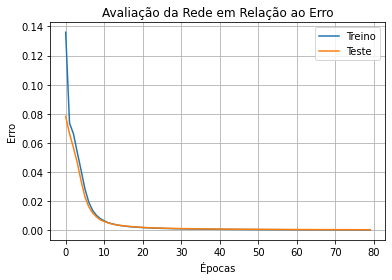

In [10]:
plt.title('Avaliação da Rede em Relação ao Erro')
plt.plot(relatorio.epoch,relatorio.history['loss'], label='Treino')
plt.plot(relatorio.epoch,relatorio.history['val_loss'], label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid()
plt.show()

Visualização da evolução da Acurácia da rede neural em relação às Épocas. De forma similar ao erro, a acurácia foi equilibrada no treino e teste, podendo assim descartar a possibilidade de overfitting.

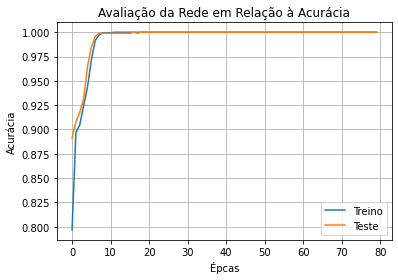

In [11]:
plt.title('Avaliação da Rede em Relação à Acurácia')
plt.plot(relatorio.epoch, relatorio.history['accuracy'], label='Treino')
plt.plot(relatorio.epoch, relatorio.history['val_accuracy'], label='Teste')
plt.xlabel('Épcas')
plt.ylabel('Acurácia')
plt.grid()
plt.legend()
plt.show()

Cálculo da acurácia, representada pela função **accuracy_score**, que recebe **y_test**, que são nossas saídas desejadas, e **y_pred**, que são as saídas preditas pela rede neural, utilizando a função **predict_classes**. Além disso, calcula-se a matriz de confusão pela função **confusion_matrix**.

In [13]:
y_pred = rna.predict_classes(X_test)
acuracia = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
print(acuracia)
print(matriz)

1.0
[[450   0]
 [  0 450]]


Visualização da Base de Dados, na primeira imagem a visualização dos dados de treinamento, e na segunda os dados de teste classificados pela rede neural.

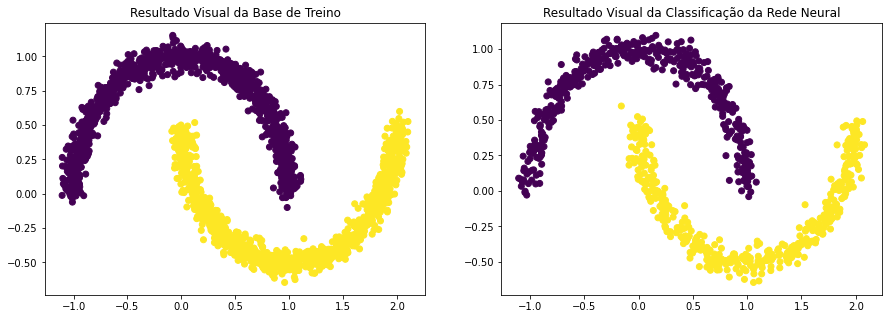

In [16]:
plt.rcParams['figure.figsize'] = (15,5)
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Resultado Visual da Base de Treino')
ax[1].set_title('Resultado Visual da Classificação da Rede Neural')
ax[0].scatter(X_train[:, 0], X_train[:,1], c=y_train)
ax[1].scatter(X_test[:, 0], X_test[:,1], c=y_pred)